## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
#Make sure we have tensorflow 2.x
#!pip3 install -U tensorflow --quiet

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
import tensorflow as tf

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [4]:
'Number of samples in the train set -  {}'.format(x_train.shape[0])

'Number of samples in the train set -  60000'

In [5]:
'Number of samples in the test set -  {}'.format(x_test.shape[0])

'Number of samples in the test set -  10000'

### Find dimensions of an image in the dataset

In [6]:
'Dimension of image in the train dataset -  {}'.format(x_train.shape[1:])

'Dimension of image in the train dataset -  (28, 28)'

In [7]:
'Dimension of image in the test dataset -  {}'.format(x_test.shape[1:])

'Dimension of image in the test dataset -  (28, 28)'

In [0]:
import numpy as np
import pandas as pd

In [0]:
# Checking the number of classes

In [10]:
pd.DataFrame(y_train).nunique()

0    10
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
## visualize the data

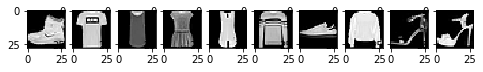

In [13]:
import numpy as np
import matplotlib.pyplot as plt

w=20
h=20
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 1
for i in range(1, columns*rows+1):
    
    img = x_train[i-1]
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img,cmap='gray')
plt.show()


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:

import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [18]:
    # Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 26s 440us/step - loss: 0.3780 - acc: 0.8645 - val_loss: 0.2967 - val_acc: 0.8943
Epoch 2/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.2297 - acc: 0.9142 - val_loss: 0.2670 - val_acc: 0.9033
Epoch 3/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.1657 - acc: 0.9379 - val_loss: 0.2619 - val_acc: 0.9066
Epoch 4/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1146 - acc: 0.9577 - val_loss: 0.2512 - val_acc: 0.9146
Epoch 5/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0759 - acc: 0.9725 - val_loss: 0.3200 - val_acc: 0.9126
Epoch 6/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0508 - acc: 0.9815 - val_loss: 0.3508 - val_acc: 0.9117
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [21]:
    # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.3904 - acc: 0.8591 - val_loss: 0.2922 - val_acc: 0.8908
Epoch 2/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.2563 - acc: 0.9057 - val_loss: 0.2554 - val_acc: 0.9030
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.2116 - acc: 0.9213 - val_loss: 0.2325 - val_acc: 0.9111
Epoch 4/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.1758 - acc: 0.9335 - val_loss: 0.2299 - val_acc: 0.9162
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1489 - acc: 0.9435 - val_loss: 0.2189 - val_acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.1253 - acc: 0.9530 - val_loss: 0.2258 - val_acc: 0.9239
Epoch 7/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.1083 - acc: 0.9590 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

[]

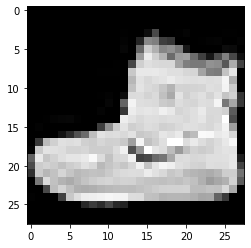

In [23]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

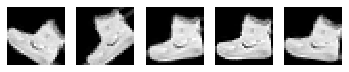

In [24]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [25]:

    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [26]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.6431 - acc: 0.7644 - val_loss: 0.4702 - val_acc: 0.8311
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4634 - acc: 0.8298 - val_loss: 0.3982 - val_acc: 0.8603
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4088 - acc: 0.8485 - val_loss: 0.3726 - val_acc: 0.8655
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3766 - acc: 0.8618 - val_loss: 0.3740 - val_acc: 0.8692
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3607 - acc: 0.8676 - val_loss: 0.3431 - val_acc: 0.8766
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3444 - acc: 0.8721 - val_loss: 0.3220 - val_acc: 0.8839
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3304 - acc: 0.8792 - val_loss: 0.3125 - val_acc: 0.8870
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [27]:
loss_and_metrics = model3.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 5s 87us/step
[0.2502768676221371, 0.9073333333333333]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator



### **Load CIFAR10 dataset**

In [29]:
from keras.datasets import cifar10
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [30]:
x_train1.shape

(50000, 32, 32, 3)

In [31]:
x_test1.shape

(10000, 32, 32, 3)

In [32]:
'Number of samples in the train set -  {}'.format(x_train1.shape[0])

'Number of samples in the train set -  50000'

In [33]:
'Number of samples in the test set -  {}'.format(x_test1.shape[0])

'Number of samples in the test set -  10000'

In [41]:
'Dimension of image in the train dataset -  {}'.format(x_train1.shape[1:])

'Dimension of image in the train dataset -  (32, 32, 3)'

In [34]:
'Dimension of image in the test dataset -  {}'.format(x_test1.shape[1:])

'Dimension of image in the test dataset -  (32, 32, 3)'

In [0]:
import numpy as np
import pandas as pd

In [0]:
# Checking the number of classes

In [37]:
pd.DataFrame(y_train1).nunique()

0    10
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes=10)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes=10)

In [0]:
## visualize the data

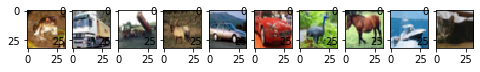

In [40]:
import numpy as np
import matplotlib.pyplot as plt

w=20
h=20
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 1
for i in range(1, columns*rows+1):
    
    img = x_train1[i-1]
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img,cmap='gray')
plt.show()


In [0]:
x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')
y_train1 = y_train1.astype('float32')
y_test1 = y_test1.astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [42]:

x_train1 /= 255
x_test1 /= 255

x_train.shape

(60000, 28, 28, 1)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:

# Prepare the generator
datagen1.fit(x_train1)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

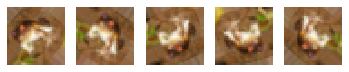

In [45]:
from matplotlib import pyplot as plt
gen = datagen1.flow(x_train1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()